<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

display(house.shape)
display(house.tail())

(985, 12)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [22]:
house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [5]:
# Remove listings where baths and beds is zero
index = house[(house['baths'] == 0) & (house['beds']==0)].index

new_house = house.drop(index)

In [6]:
sqft = house[(house['sq__ft'] == 0)].index

new_house = house.drop(sqft)

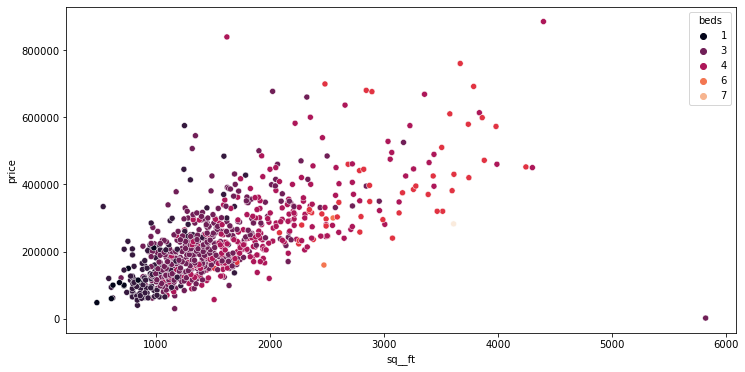

In [9]:
sns.color_palette("rocket")
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'price', x = 'sq__ft',hue ='beds',data = new_house, palette = 'rocket')

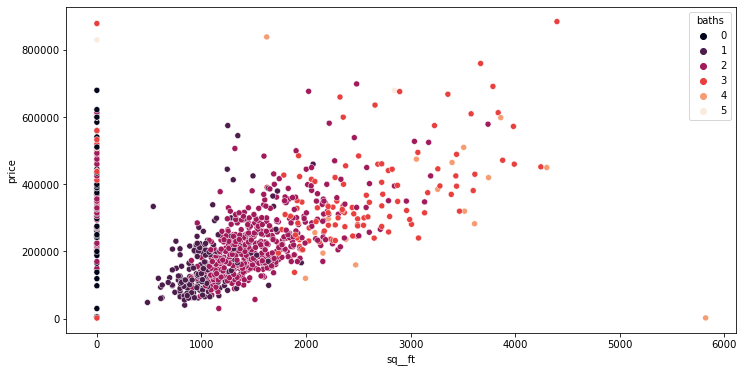

In [10]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'price', x = 'sq__ft',hue ='baths',data = house, palette = 'rocket')

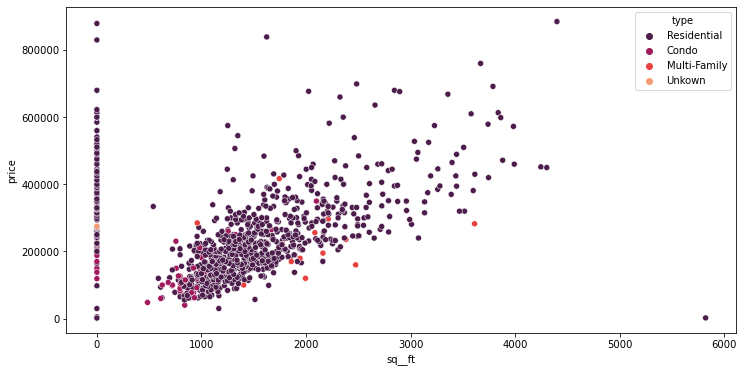

In [11]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'price', x = 'sq__ft',hue ='type',data = house, palette = 'rocket')

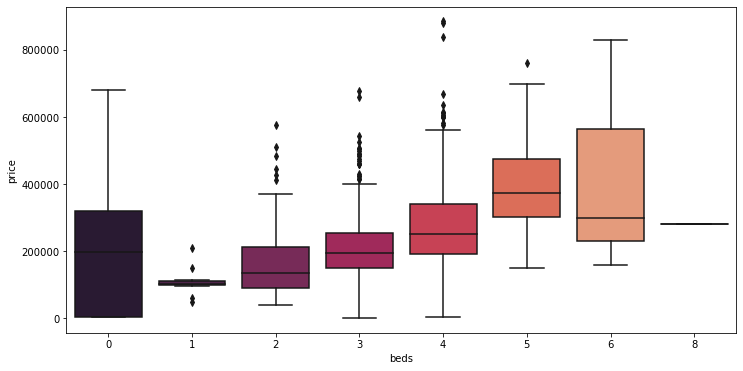

In [12]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'price', x = 'beds',data = house, palette = 'rocket')

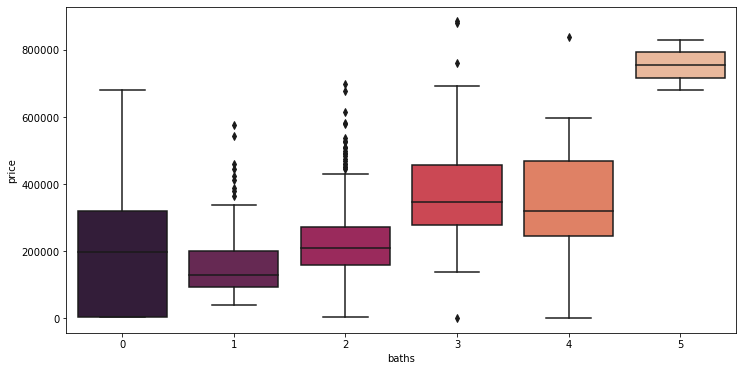

In [13]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'price', x = 'baths',data = house, palette = 'rocket')

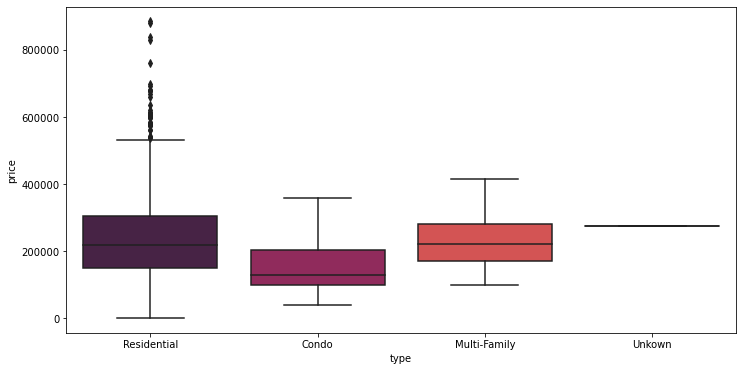

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'price', x = 'type',data = house, palette = 'rocket')

In [7]:
new_house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


In [ ]:
new_house.groupby(['beds','baths']).describe()

**Findings**

Most common house type: 3 Beds and 2 Bathrooms


2) As square feet increases, price increases

3) As no of bed increases, price increases

4) As no of bath increases, price increases

4) Condo types housing seems to be the cheapers

5) There are 108 listings where there are no details for bath, bed and sq__ft

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#Price is the target variable as that is what we want to measure

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
# Type, Beds, Baths, Square_Foot 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [15]:
# ANSWER
new_house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


In [ ]:
house.corr()

Best Predictor seems to be bath at the moment as it has the highest correlation with price

After dropping rows where sq_ft is zero, sq_ft becomes the best predict

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER

Using Sq_ft seems like the easiest way to predict the price

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [ ]:
# ANSWER

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [66]:
# ANSWER
x = new_house.sq__ft
y = new_house.price



##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [27]:
# ANSWER
x_mean = new_house.sq__ft.mean()
y_mean = new_house.price.mean()

num = ((x-x_mean)*(y-y_mean)).sum()
den = ((x-x_mean)**2).sum()

b1 = num/den
b1

125.21648667984462

In [46]:
type(x)

pandas.core.series.Series

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [28]:
# ANSWER
b0 = y_mean - (b1*x_mean)
b0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [71]:
# ANSWER

yhat = b0 + b1*x


0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [74]:
# ANSWER

res = y - yhat
type(res)

pandas.core.series.Series

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [78]:
# ANSWER
def r_square(y, y_mean, res):
    ss_tot =((y - y_mean)**2).sum()
    ss_res =(res**2).sum()
    r2 = 1 - (ss_res/ss_tot)
    return r2
    

r_square(y,y_mean,res)

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

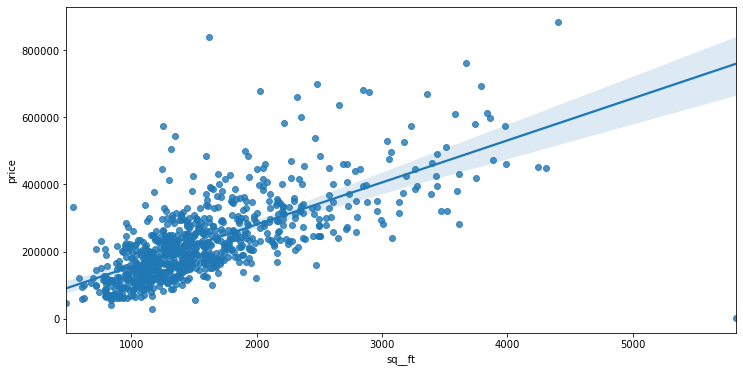

In [41]:
# ANSWER
plt.figure(figsize = (12,6))
sns.regplot(x='sq__ft', y='price', data = new_house)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

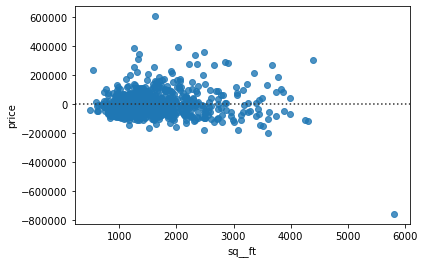

In [79]:
# ANSWER

sns.residplot(data=new_house,x = 'sq__ft', y='price')

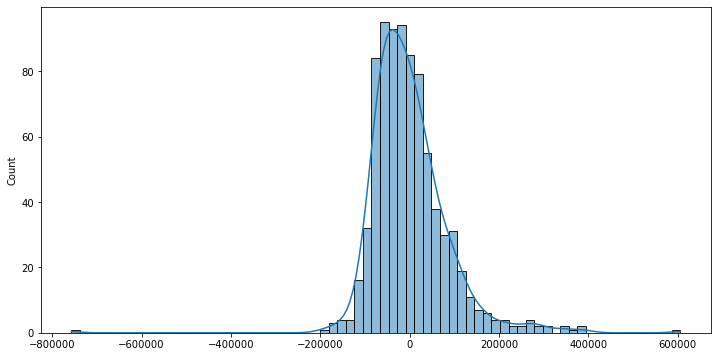

In [85]:
plt.figure(figsize =(12,6))
sns.histplot(res, kde = True)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [44]:
# ANSWER

print(b0 + (b1*1204))

180971.28382945186


In [60]:
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
print(corr**2)

0.4812307133326899




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



